# [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook section of User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook).

In [3]:
import numpy as np
import pandas as pd

## Object creation
+ [Intro to Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html).
+ [Creating a Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

###### [Creating a Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [4]:
# dir(pd.Series)
# print(dir(pd.Series))

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)
s.shape

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


(6,)

###### [Creating a DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a datetime index and labeled columns:

In [12]:
# print(dir(pd))

In [6]:
dates = pd.date_range('20130101', periods=6)
print(type(dates)); print()
print(dates)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [7]:
# np.random.randn(6, 4): shape() is 6 x 4
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df); print()
print(df.B)

                   A         B         C         D
2013-01-01  0.240099 -1.058798  0.244605 -0.574273
2013-01-02  0.634231 -1.730935 -0.520189  1.712439
2013-01-03  0.550910  1.034256 -0.165779 -1.998708
2013-01-04  0.307078  1.037217  0.243584  0.199274
2013-01-05  0.005246  0.259385  0.946301  0.981531
2013-01-06  0.668474 -0.807586  0.378564  1.150119

2013-01-01   -1.058798
2013-01-02   -1.730935
2013-01-03    1.034256
2013-01-04    1.037217
2013-01-05    0.259385
2013-01-06   -0.807586
Freq: D, Name: B, dtype: float64


In [21]:
# print(help(np.random.randn))

###### Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [1]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

NameError: name 'pd' is not defined

In [51]:
# dir(df2.C.dtype)

[The columns of the resulting DataFrame have different dtypes](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes). 

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, **tab completion for column names (as well as public attributes)** is automatically enabled. Here’s a subset of the attributes that will be completed:

In [ ]:
df.<Tab>

## Viewing data

[See the Basics section](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics).

Here is how to view the top and bottom rows of the frame:

In [77]:
# df.head() gets 5 rows by default
df.head()

,A,B,C,D
2013-01-01,-0.934920,-0.730798,-0.118679,-1.013700
2013-01-02,-0.500062,0.191669,0.740629,0.059801
2013-01-03,-1.322753,0.559268,1.226999,-0.096116
2013-01-04,-1.944514,1.107714,0.029798,0.244786
2013-01-05,0.593546,0.577528,0.991399,-1.949627


In [59]:
df.tail(3)

,A,B,C,D
2013-01-04,1.920598,0.179615,0.592052,-1.792725
2013-01-05,-0.848573,-1.512285,-0.537398,-1.004439
2013-01-06,-0.964003,0.235574,-1.044723,0.657416


###### Display the index, columns:

In [61]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

[DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call [DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) of all floating-point values, [DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) is fast and doesn’t require copying data.

In [80]:
print(df); print()
print(df.to_numpy())

                   A         B         C         D
2013-01-01 -0.934920 -0.730798 -0.118679 -1.013700
2013-01-02 -0.500062  0.191669  0.740629  0.059801
2013-01-03 -1.322753  0.559268  1.226999 -0.096116
2013-01-04 -1.944514  1.107714  0.029798  0.244786
2013-01-05  0.593546  0.577528  0.991399 -1.949627
2013-01-06 -0.551266 -1.142956  1.309361  0.136749

[[-0.93492033 -0.73079816 -0.11867861 -1.01370016]
 [-0.50006248  0.19166941  0.74062915  0.05980128]
 [-1.32275316  0.55926808  1.22699939 -0.09611623]
 [-1.94451355  1.10771402  0.02979823  0.24478615]
 [ 0.59354588  0.5775277   0.99139887 -1.94962694]
 [-0.55126608 -1.14295613  1.30936111  0.13674861]]


For df2, the DataFrame (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) with multiple dtypes, DataFrame.to_numpy() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) is relatively expensive.

In [82]:
print(df2); print()
print(df2.to_numpy())

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


###### Note
DataFrame.to_numpy() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) does not include the index or column labels in the output.

###### describe()  (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your data:

In [83]:
# df.describe(): descriptive statistics
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.776662,0.093737,0.696585,-0.436351
std,0.859293,0.859975,0.609089,0.869213
min,-1.944514,-1.142956,-0.118679,-1.949627
25%,-1.225795,-0.500181,0.207506,-0.784304
50%,-0.743093,0.375469,0.866014,-0.018157
75%,-0.512863,0.572963,1.168099,0.117512
max,0.593546,1.107714,1.309361,0.244786


###### Transposing your data:

In [84]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.934920,-0.500062,-1.322753,-1.944514,0.593546,-0.551266
B,-0.730798,0.191669,0.559268,1.107714,0.577528,-1.142956
C,-0.118679,0.740629,1.226999,0.029798,0.991399,1.309361
D,-1.013700,0.059801,-0.096116,0.244786,-1.949627,0.136749


###### Sorting by an axis:

In [95]:
print(df.sort_index(axis=1, ascending=False))
print(df.sort_index(axis=1, ascending=True))

                   D         C         B         A
2013-01-01 -1.013700 -0.118679 -0.730798 -0.934920
2013-01-02  0.059801  0.740629  0.191669 -0.500062
2013-01-03 -0.096116  1.226999  0.559268 -1.322753
2013-01-04  0.244786  0.029798  1.107714 -1.944514
2013-01-05 -1.949627  0.991399  0.577528  0.593546
2013-01-06  0.136749  1.309361 -1.142956 -0.551266
                   A         B         C         D
2013-01-01 -0.934920 -0.730798 -0.118679 -1.013700
2013-01-02 -0.500062  0.191669  0.740629  0.059801
2013-01-03 -1.322753  0.559268  1.226999 -0.096116
2013-01-04 -1.944514  1.107714  0.029798  0.244786
2013-01-05  0.593546  0.577528  0.991399 -1.949627
2013-01-06 -0.551266 -1.142956  1.309361  0.136749


In [94]:
print(df.sort_index(axis=0, ascending=False))
print(df.sort_index(axis=0, ascending=True))

                   A         B         C         D
2013-01-06 -0.551266 -1.142956  1.309361  0.136749
2013-01-05  0.593546  0.577528  0.991399 -1.949627
2013-01-04 -1.944514  1.107714  0.029798  0.244786
2013-01-03 -1.322753  0.559268  1.226999 -0.096116
2013-01-02 -0.500062  0.191669  0.740629  0.059801
2013-01-01 -0.934920 -0.730798 -0.118679 -1.013700
                   A         B         C         D
2013-01-01 -0.934920 -0.730798 -0.118679 -1.013700
2013-01-02 -0.500062  0.191669  0.740629  0.059801
2013-01-03 -1.322753  0.559268  1.226999 -0.096116
2013-01-04 -1.944514  1.107714  0.029798  0.244786
2013-01-05  0.593546  0.577528  0.991399 -1.949627
2013-01-06 -0.551266 -1.142956  1.309361  0.136749


###### Sorting by values:

In [101]:
print(df.sort_values(by='B', ascending=False))
print(df.sort_values(by='B', ascending=True))

                   A         B         C         D
2013-01-04 -1.944514  1.107714  0.029798  0.244786
2013-01-05  0.593546  0.577528  0.991399 -1.949627
2013-01-03 -1.322753  0.559268  1.226999 -0.096116
2013-01-02 -0.500062  0.191669  0.740629  0.059801
2013-01-01 -0.934920 -0.730798 -0.118679 -1.013700
2013-01-06 -0.551266 -1.142956  1.309361  0.136749
                   A         B         C         D
2013-01-06 -0.551266 -1.142956  1.309361  0.136749
2013-01-01 -0.934920 -0.730798 -0.118679 -1.013700
2013-01-02 -0.500062  0.191669  0.740629  0.059801
2013-01-03 -1.322753  0.559268  1.226999 -0.096116
2013-01-05  0.593546  0.577528  0.991399 -1.949627
2013-01-04 -1.944514  1.107714  0.029798  0.244786


## Selection

Note

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, **.at, .iat, .loc and .iloc**.

See the indexing documentation Indexing and Selecting Data (https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and MultiIndex / Advanced Indexing (https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

### Getting

###### Selecting a single column, which yields a Series, equivalent to df.A:

In [105]:
df['A']

2013-01-01   -0.934920
2013-01-02   -0.500062
2013-01-03   -1.322753
2013-01-04   -1.944514
2013-01-05    0.593546
2013-01-06   -0.551266
Freq: D, Name: A, dtype: float64

###### Selecting via [], which slices the rows.

In [110]:
df[0:1]

,A,B,C,D
2013-01-01,-0.93492,-0.730798,-0.118679,-1.0137


In [106]:
df[0:3]

,A,B,C,D
2013-01-01,-0.934920,-0.730798,-0.118679,-1.013700
2013-01-02,-0.500062,0.191669,0.740629,0.059801
2013-01-03,-1.322753,0.559268,1.226999,-0.096116


### Selection by label

See more in Selection by Label (https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

###### For getting a cross section using a label:

In [115]:
df.loc[dates[0]]

A   -0.934920
B   -0.730798
C   -0.118679
D   -1.013700
Name: 2013-01-01 00:00:00, dtype: float64

In [122]:
df.loc[dates[0],]

A   -0.934920
B   -0.730798
C   -0.118679
D   -1.013700
Name: 2013-01-01 00:00:00, dtype: float64

In [118]:
df.loc[dates[0:1],]

,A,B,C,D
2013-01-01,-0.93492,-0.730798,-0.118679,-1.0137


In [135]:
print(df.loc[dates[1:3],'B']); print()
print(type(df.loc[dates[1:3],'B']))

2013-01-02    0.191669
2013-01-03    0.559268
Freq: D, Name: B, dtype: float64

<class 'pandas.core.series.Series'>


In [136]:
print(df.loc[dates[1:3],'B':'B']); print()
print(type(df.loc[dates[1:3],'B':'B']))

                   B
2013-01-02  0.191669
2013-01-03  0.559268

<class 'pandas.core.frame.DataFrame'>


In [137]:
df.loc[dates[1:3],'B':'D']

,B,C,D
2013-01-02,0.191669,0.740629,0.059801
2013-01-03,0.559268,1.226999,-0.096116


In [139]:
df.loc[dates[1:3],['B','D']]

,B,D
2013-01-02,0.191669,0.059801
2013-01-03,0.559268,-0.096116


In [148]:
df.loc[[dates[1], dates[3]],['B','D']]

,B,D
2013-01-02,0.191669,0.059801
2013-01-04,1.107714,0.244786


###### Selecting on a multi-axis by label:

In [140]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.934920,-0.730798
2013-01-02,-0.500062,0.191669
2013-01-03,-1.322753,0.559268
2013-01-04,-1.944514,1.107714
2013-01-05,0.593546,0.577528
2013-01-06,-0.551266,-1.142956


###### Showing label slicing, both endpoints are included:

In [22]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,2.118563,-1.603789
2013-01-03,1.132825,-0.080148
2013-01-04,0.818015,1.150053


###### Reduction in the dimensions of the returned object:

In [23]:
df.loc['20130102', ['A', 'B']]

A    2.118563
B   -1.603789
Name: 2013-01-02 00:00:00, dtype: float64

###### For getting a scalar value:

In [24]:
df.loc[dates[0], 'A']

1.2121749364348577

###### For getting fast access to a scalar (equivalent to the prior method):

In [149]:
# Access a single value for a row/column label pair.
df.at[dates[0], 'A']

-0.9349203346040739

### Selection by position
+ See more in Selection by Position
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer

###### Select via the position of the passed integers:

In [153]:
# get the row with index 3
df.iloc[3]

A   -1.944514
B    1.107714
C    0.029798
D    0.244786
Name: 2013-01-04 00:00:00, dtype: float64

###### By integer slices, acting similar to numpy/python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.818015,1.150053
2013-01-05,0.865930,-0.455744


###### By lists of integer position locations, similar to the numpy/python style:

In [155]:
df.iloc[[0, 1, 4], [0, 2]]

,A,C
2013-01-01,-0.934920,-0.118679
2013-01-02,-0.500062,0.740629
2013-01-05,0.593546,0.991399


###### For slicing rows explicitly:

In [8]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.634231,-1.730935,-0.520189,1.712439
2013-01-03,0.550910,1.034256,-0.165779,-1.998708


###### For slicing columns explicitly:

In [9]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.058798,0.244605
2013-01-02,-1.730935,-0.520189
2013-01-03,1.034256,-0.165779
2013-01-04,1.037217,0.243584
2013-01-05,0.259385,0.946301
2013-01-06,-0.807586,0.378564


###### For getting a value explicitly:

In [10]:
df.iloc[1, 1]

-1.7309347661885162

###### For getting fast access to a scalar (equivalent to the prior method):

In [11]:
df

,A,B,C,D
2013-01-01,0.240099,-1.058798,0.244605,-0.574273
2013-01-02,0.634231,-1.730935,-0.520189,1.712439
2013-01-03,0.550910,1.034256,-0.165779,-1.998708
2013-01-04,0.307078,1.037217,0.243584,0.199274
2013-01-05,0.005246,0.259385,0.946301,0.981531
2013-01-06,0.668474,-0.807586,0.378564,1.150119


### Boolean indexing
+ Using a single column’s values to select data.

### AAA

In [12]:
df[df['A'] > 0]

,A,B,C,D
2013-01-01,0.240099,-1.058798,0.244605,-0.574273
2013-01-02,0.634231,-1.730935,-0.520189,1.712439
2013-01-03,0.550910,1.034256,-0.165779,-1.998708
2013-01-04,0.307078,1.037217,0.243584,0.199274
2013-01-05,0.005246,0.259385,0.946301,0.981531
2013-01-06,0.668474,-0.807586,0.378564,1.150119


###### Selecting values from a DataFrame where a boolean condition is met.

In [13]:
df[df > 0]

,A,B,C,D
2013-01-01,0.240099,NaN,0.244605,NaN
2013-01-02,0.634231,NaN,NaN,1.712439
2013-01-03,0.550910,1.034256,NaN,NaN
2013-01-04,0.307078,1.037217,0.243584,0.199274
2013-01-05,0.005246,0.259385,0.946301,0.981531
2013-01-06,0.668474,NaN,0.378564,1.150119


###### Using the isin() method for filtering:

In [14]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2)
df2[df2['E'].isin(['two', 'four'])]

                   A         B         C         D      E
2013-01-01  0.240099 -1.058798  0.244605 -0.574273    one
2013-01-02  0.634231 -1.730935 -0.520189  1.712439    one
2013-01-03  0.550910  1.034256 -0.165779 -1.998708    two
2013-01-04  0.307078  1.037217  0.243584  0.199274  three
2013-01-05  0.005246  0.259385  0.946301  0.981531   four
2013-01-06  0.668474 -0.807586  0.378564  1.150119  three


,A,B,C,D,E
2013-01-03,0.550910,1.034256,-0.165779,-1.998708,two
2013-01-05,0.005246,0.259385,0.946301,0.981531,four


### Setting
+ Setting a new column automatically aligns the data by the indexes.

In [229]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

###### Setting values by label:

In [15]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,-1.058798,0.244605,-0.574273
2013-01-02,0.634231,-1.730935,-0.520189,1.712439
2013-01-03,0.550910,1.034256,-0.165779,-1.998708
2013-01-04,0.307078,1.037217,0.243584,0.199274
2013-01-05,0.005246,0.259385,0.946301,0.981531
2013-01-06,0.668474,-0.807586,0.378564,1.150119


###### Setting values by position:

In [17]:
df.iat[0, 3] = 0
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.244605,0.000000
2013-01-02,0.634231,-1.730935,-0.520189,1.712439
2013-01-03,0.550910,1.034256,-0.165779,-1.998708
2013-01-04,0.307078,1.037217,0.243584,0.199274
2013-01-05,0.005246,0.259385,0.946301,0.981531
2013-01-06,0.668474,-0.807586,0.378564,1.150119


###### Setting by assigning with a NumPy array:

In [234]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,0,1,2,3,A,D
0,-0.452347,0.000000,-0.492663,-0.592595,NaN,5
1,-1.396685,1.172041,-1.030444,-0.055827,NaN,5
2,1.018070,0.415778,0.455589,-0.728380,NaN,5
3,-0.244539,0.201731,2.007096,0.650658,NaN,5
4,0.777569,-0.929257,-0.824350,-0.686570,NaN,5
5,0.426616,-1.059859,-0.002069,-1.632044,NaN,5
6,1.059179,-1.212369,-0.557070,0.603420,NaN,5
7,0.435240,1.632130,-0.085624,-0.218480,NaN,5
8,0.027477,-0.784298,-1.987955,0.062137,NaN,5
9,1.094354,-0.690718,-2.697168,0.473040,NaN,5


###### A where operation with setting

In [33]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,-1.212175,-1.294127,-0.517215,-0.098049
2013-01-02,-2.118563,-1.603789,-0.172416,-0.222954
2013-01-03,-1.132825,-0.080148,-0.573932,-0.873075
2013-01-04,-0.818015,-1.150053,-1.878720,-0.700022
2013-01-05,-0.865930,-0.455744,-0.145461,-1.759736
2013-01-06,-0.027276,-0.462901,-1.243843,-0.901722


## Missing data
+ pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 
+ See the Missing Data section:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data

##### Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [34]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,E
2013-01-01,1.212175,-1.294127,0.517215,-0.098049,1.0
2013-01-02,2.118563,-1.603789,0.172416,-0.222954,1.0
2013-01-03,1.132825,-0.080148,-0.573932,0.873075,NaN
2013-01-04,0.818015,1.150053,1.878720,-0.700022,NaN


###### To drop any rows that have missing data

In [36]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,1.212175,-1.294127,0.517215,-0.098049,1.0
2013-01-02,2.118563,-1.603789,0.172416,-0.222954,1.0


###### Filling missing data

In [37]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.212175,-1.294127,0.517215,-0.098049,1.0
2013-01-02,2.118563,-1.603789,0.172416,-0.222954,1.0
2013-01-03,1.132825,-0.080148,-0.573932,0.873075,5.0
2013-01-04,0.818015,1.150053,1.878720,-0.700022,5.0


###### To get the boolean mask where values are nan

In [38]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations
+ See the Basic section on Binary Ops.
    + https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-binop

### Stats
+ Operations in general exclude missing data.

###### Performing a descriptive statistic:

In [40]:
df.mean()

A    1.029131
B   -0.457776
C    0.149340
D   -0.167661
dtype: float64

###### Same operation on the other axis:

In [20]:
df.mean(0)

A    0.360990
B   -0.034611
C    0.187848
D    0.340776
dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [21]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [25]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.449090,0.034256,-1.165779,-2.998708
2013-01-04,-2.692922,-1.962783,-2.756416,-2.800726
2013-01-05,-4.994754,-4.740615,-4.053699,-4.018469
2013-01-06,NaN,NaN,NaN,NaN


## Apply

###### Applying functions to the data:

In [44]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.212175,-1.294127,0.517215,-0.098049
2013-01-02,3.330738,-2.897916,0.689631,-0.321003
2013-01-03,4.463564,-2.978064,0.115699,0.552072
2013-01-04,5.281578,-1.828011,1.994420,-0.147950
2013-01-05,6.147508,-2.283755,2.139881,-1.907687
2013-01-06,6.174784,-2.746656,0.896038,-1.005965


In [45]:
df.apply(lambda x: x.max() - x.min())

A    2.091288
B    2.753842
C    3.122563
D    2.661458
dtype: float64

## Histogramming
+ See more at Histogramming and Discretization.
    + https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-discretization

In [46]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    5
2    2
3    5
4    5
5    0
6    2
7    1
8    5
9    3
dtype: int32

In [47]:
s.value_counts()

5    4
3    2
2    2
1    1
0    1
dtype: int64

## String Methods
+ Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions(https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). 
+ See more at Vectorized String Methods.
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods

In [49]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat
+ pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.
+ See the Merging section.
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging

###### Concatenating pandas objects together with concat():
    + https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat

In [26]:
df = pd.DataFrame(np.random.randn(10, 4))
print(df)

          0         1         2         3
0  0.755459  0.172736  1.555324  1.672178
1  0.261374 -0.138155  0.159724  0.692062
2  0.057071  0.096647  0.192828  1.465044
3 -1.892851  0.918816  0.256506  1.194120
4 -0.155878  0.415451  0.220326 -1.047284
5 -1.115793 -0.364695  0.303838  1.035627
6  1.201211  0.538154  0.500871  0.305392
7  1.063521 -0.037559 -0.706266  1.253358
8 -0.324848 -0.736250  1.720044 -2.049627
9 -0.181329 -0.402989 -1.819154  0.102929


###### break it into pieces

In [27]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
print(pieces)
print('-'*35)
pd.concat(pieces)

[          0         1         2         3
0  0.755459  0.172736  1.555324  1.672178
1  0.261374 -0.138155  0.159724  0.692062
2  0.057071  0.096647  0.192828  1.465044,           0         1         2         3
3 -1.892851  0.918816  0.256506  1.194120
4 -0.155878  0.415451  0.220326 -1.047284
5 -1.115793 -0.364695  0.303838  1.035627
6  1.201211  0.538154  0.500871  0.305392,           0         1         2         3
7  1.063521 -0.037559 -0.706266  1.253358
8 -0.324848 -0.736250  1.720044 -2.049627
9 -0.181329 -0.402989 -1.819154  0.102929]
-----------------------------------


,0,1,2,3
0,0.755459,0.172736,1.555324,1.672178
1,0.261374,-0.138155,0.159724,0.692062
2,0.057071,0.096647,0.192828,1.465044
3,-1.892851,0.918816,0.256506,1.194120
4,-0.155878,0.415451,0.220326,-1.047284
5,-1.115793,-0.364695,0.303838,1.035627
6,1.201211,0.538154,0.500871,0.305392
7,1.063521,-0.037559,-0.706266,1.253358
8,-0.324848,-0.736250,1.720044,-2.049627
9,-0.181329,-0.402989,-1.819154,0.102929


###### Note
+ Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it. 
+ See Appending to dataframe for more.
    + Appending to dataframe: 
        + https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation

## Join
+ SQL style merges. See the Database style joining section.
+ Database style joining:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join

In [30]:
import pandas as pd
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print('-'*20)
print(right)
print('-'*20)
x = pd.merge(left, right, on='key')
print(x)

   key  lval
0  foo     1
1  foo     2
--------------------
   key  rval
0  foo     4
1  foo     5
--------------------
   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


##### Another example that can be given is:

In [31]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print('-'*20)
print(right)
print('-'*20)
x = pd.merge(left, right, on='key')
print(x)

   key  lval
0  foo     1
1  bar     2
--------------------
   key  rval
0  foo     4
1  bar     5
--------------------
   key  lval  rval
0  foo     1     4
1  bar     2     5


## Grouping
+ By “group by” we are referring to a process involving one or more of the following steps:
    + Splitting the data into groups based on some criteria
    + Applying a function to each group independently
    + Combining the results into a data structure
+ See the Grouping section.

In [12]:
import numpy as np
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.446848,-0.029129
1,bar,one,0.486581,-0.891592
2,foo,two,0.624297,0.743843
3,bar,three,-1.709162,0.851515
4,foo,two,1.340485,1.316810
5,bar,two,-0.846887,0.052406
6,foo,one,-0.263554,0.469964
7,foo,three,-2.668715,0.770176


###### Grouping and then applying the sum() function to the resulting groups.

In [13]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.069468,0.012330
foo,-0.520639,3.271663


###### Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [14]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.486581 -0.891592
    three -1.709162  0.851515
    two   -0.846887  0.052406
foo one    0.183294  0.440835
    three -2.668715  0.770176
    two    1.964782  2.060652

## Reshaping
+ See the sections on Hierarchical Indexing and Reshaping.
+ Hierarchical Indexing:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical
+ Reshaping
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking

## Stack

In [15]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.657921  1.133426
      two    -1.547778  1.940598
baz   one     1.179491 -0.676816
      two    -0.127846 -0.170815

###### The stack() method “compresses” a level in the DataFrame’s columns.
+ stack() method:
    + https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack

In [16]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.657921
               B    1.133426
       two     A   -1.547778
               B    1.940598
baz    one     A    1.179491
               B   -0.676816
       two     A   -0.127846
               B   -0.170815
dtype: float64

###### With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level.
+ stack():
    + https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack
+ unstack():
    + https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack

In [19]:
stacked.unstack()

A         B
first second                    
bar   one     0.657921  1.133426
      two    -1.547778  1.940598
baz   one     1.179491 -0.676816
      two    -0.127846 -0.170815

In [20]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.657921 -1.547778
      B  1.133426  1.940598
baz   A  1.179491 -0.127846
      B -0.676816 -0.170815

In [21]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.657921  1.179491
       B  1.133426 -0.676816
two    A -1.547778 -0.127846
       B  1.940598 -0.170815

## Pivot tables
+ See the section on Pivot Tables.
+ Pivot Tables:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot

In [22]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.538958,1.838930
1,one,B,foo,1.491338,0.031237
2,two,C,foo,1.225954,-0.632897
3,three,A,bar,-1.486368,0.087461
4,one,B,bar,0.783270,0.695013
5,one,C,bar,-1.496510,-0.230908
6,two,A,foo,0.294125,-0.922398
7,three,B,foo,0.500231,-0.502373
8,one,C,foo,-1.122581,1.818049
9,one,A,bar,1.331313,-1.310350


###### We can produce pivot tables from this data very easily:

In [23]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.331313  0.538958
      B  0.783270  1.491338
      C -1.496510 -1.122581
three A -1.486368       NaN
      B       NaN  0.500231
      C  1.876440       NaN
two   A       NaN  0.294125
      B  0.862660       NaN
      C       NaN  1.225954

## Time series
+ pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.
+ Time Series:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries

In [24]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    25100
Freq: 5T, dtype: int32

###### Time zone representation:

In [25]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.006276
2012-03-07   -0.618812
2012-03-08   -0.548549
2012-03-09   -2.425055
2012-03-10   -2.061188
Freq: D, dtype: float64

In [26]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.006276
2012-03-07 00:00:00+00:00   -0.618812
2012-03-08 00:00:00+00:00   -0.548549
2012-03-09 00:00:00+00:00   -2.425055
2012-03-10 00:00:00+00:00   -2.061188
Freq: D, dtype: float64

###### Converting to another time zone:

In [27]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.006276
2012-03-06 19:00:00-05:00   -0.618812
2012-03-07 19:00:00-05:00   -0.548549
2012-03-08 19:00:00-05:00   -2.425055
2012-03-09 19:00:00-05:00   -2.061188
Freq: D, dtype: float64

###### Converting between time span representations:

In [28]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.971502
2012-02-29   -1.699971
2012-03-31    1.342633
2012-04-30    0.461350
2012-05-31   -0.901913
Freq: M, dtype: float64

In [29]:
ps = ts.to_period()
ps

2012-01    0.971502
2012-02   -1.699971
2012-03    1.342633
2012-04    0.461350
2012-05   -0.901913
Freq: M, dtype: float64

In [30]:
ps.to_timestamp()

2012-01-01    0.971502
2012-02-01   -1.699971
2012-03-01    1.342633
2012-04-01    0.461350
2012-05-01   -0.901913
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [31]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.671849
1990-06-01 09:00    0.126066
1990-09-01 09:00    0.147631
1990-12-01 09:00    0.543809
1991-03-01 09:00    0.512370
Freq: H, dtype: float64

## Categoricals
+ pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.
+ categorical introduction:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical
+ API documentation:
    + https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical

In [33]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


###### Convert the raw grades to a categorical data type.

In [39]:
df["grade"] = df["raw_grade"].astype("category")
print(df["grade"])
df

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]


,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


###### Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [41]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


###### Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [44]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

###### Sorting is per order in the categories, not lexical order.

In [42]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


###### Grouping by a categorical column also shows empty categories.

In [45]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
+ See the Plotting docs:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization
+ We use the standard convention for referencing the matplotlib API:

In [46]:
import matplotlib.pyplot as plt
plt.close('all')

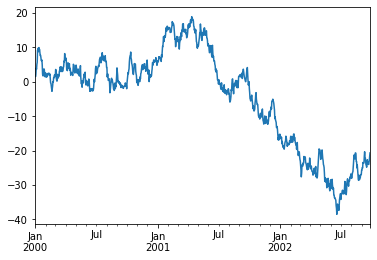

In [47]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

###### On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:
+  plot() method:
    + https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

<Figure size 432x288 with 0 Axes>

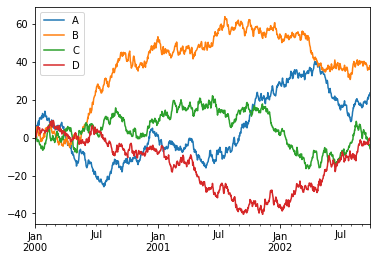

In [48]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

## Getting data in/out CSV
+ Writing to a csv file:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv

In [50]:
import os
os.getcwd()
os.chdir("D:/Python/tutorial/1")
os.getcwd()

In [51]:
df.to_csv('foo.csv')

+ Reading from a csv file:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table

In [52]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.800329,0.913494,0.299643,0.392111
1,2000-01-02,1.067843,2.148094,0.214608,-0.182763
2,2000-01-03,2.368881,3.026278,-0.461805,0.361246
3,2000-01-04,4.163731,1.976473,0.817103,0.733848
4,2000-01-05,5.671691,3.947908,0.699115,2.218069
...,...,...,...,...,...
995,2002-09-22,21.800384,36.675233,-3.432938,-3.006645
996,2002-09-23,22.468030,36.049110,-4.158191,-0.655297
997,2002-09-24,22.126908,36.274957,-3.812693,-1.191222
998,2002-09-25,22.795934,37.964517,-4.662347,-0.246539


## HDF5
+ Reading and writing to HDFStores.
+ HDFStores:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5

###### Writing to a HDF5 Store.

In [53]:
df.to_hdf('foo.h5', 'df')

###### Reading from a HDF5 Store.

In [54]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.800329,0.913494,0.299643,0.392111
2000-01-02,1.067843,2.148094,0.214608,-0.182763
2000-01-03,2.368881,3.026278,-0.461805,0.361246
2000-01-04,4.163731,1.976473,0.817103,0.733848
2000-01-05,5.671691,3.947908,0.699115,2.218069
...,...,...,...,...
2002-09-22,21.800384,36.675233,-3.432938,-3.006645
2002-09-23,22.468030,36.049110,-4.158191,-0.655297
2002-09-24,22.126908,36.274957,-3.812693,-1.191222
2002-09-25,22.795934,37.964517,-4.662347,-0.246539


## Excel
+ Reading and writing to MS Excel.
+ MS Excel:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel

###### Writing to an excel file.

In [55]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

###### Reading from an excel file.

In [56]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.800329,0.913494,0.299643,0.392111
1,2000-01-02,1.067843,2.148094,0.214608,-0.182763
2,2000-01-03,2.368881,3.026278,-0.461805,0.361246
3,2000-01-04,4.163731,1.976473,0.817103,0.733848
4,2000-01-05,5.671691,3.947908,0.699115,2.218069
...,...,...,...,...,...
995,2002-09-22,21.800384,36.675233,-3.432938,-3.006645
996,2002-09-23,22.468030,36.049110,-4.158191,-0.655297
997,2002-09-24,22.126908,36.274957,-3.812693,-1.191222
998,2002-09-25,22.795934,37.964517,-4.662347,-0.246539


## Gotchas
+ If you are attempting to perform an operation you might see an exception like:

In [57]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

###### See Comparisons for an explanation and what to do.
+ Comparisons:
    + https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-compare
+ Gotchas:
    + https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas